# **Thank You for opening this notebook!!!**

## **This notebook tutorial is for those who are beginners to machine learning.**

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Stochastic Gradient Descent Classifier**

**3. Support Vector Classifier(SVC) **

*Then I use cross validation evaluation technique to optimize the model performance.*

**1. Grid Search CV**

**2. Cross Validation Score**

## **If you find this notebook useful then please upvote.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
#Loading dataset
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [ ]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Let's do some plotting to know how the data columns are distributed in the dataset**

<Axes: xlabel='quality', ylabel='fixed acidity'>

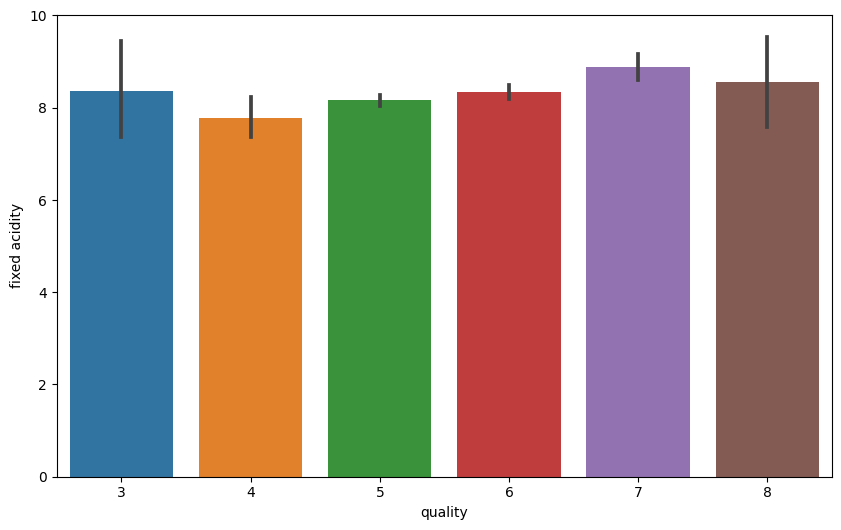

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

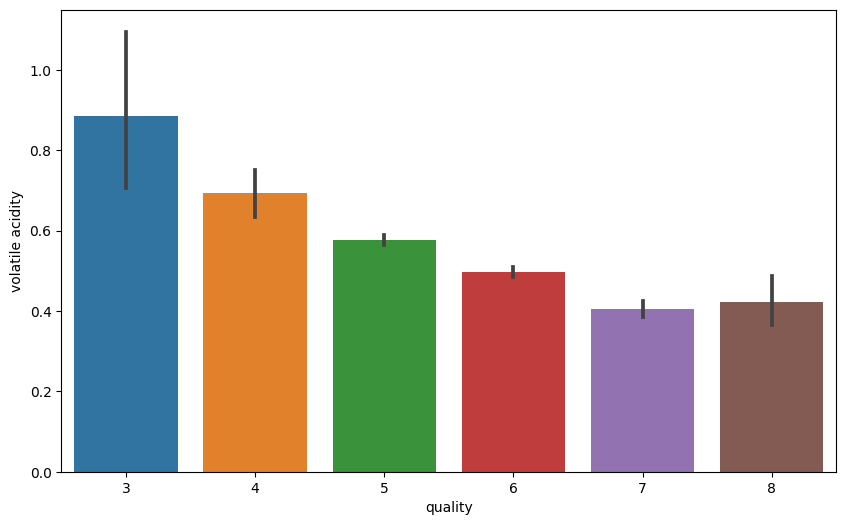

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

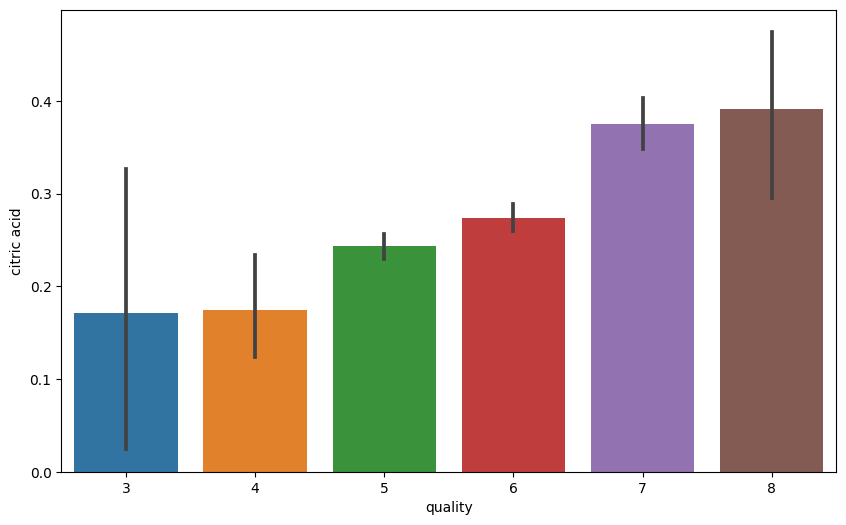

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

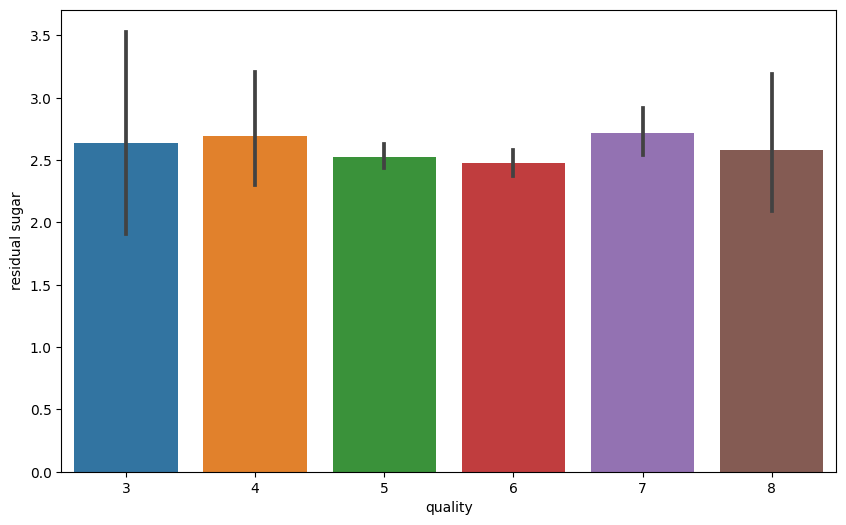

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

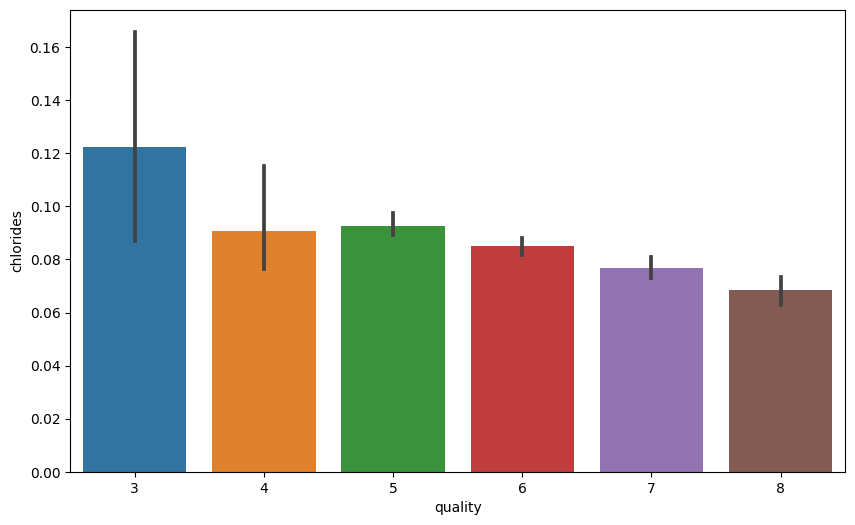

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

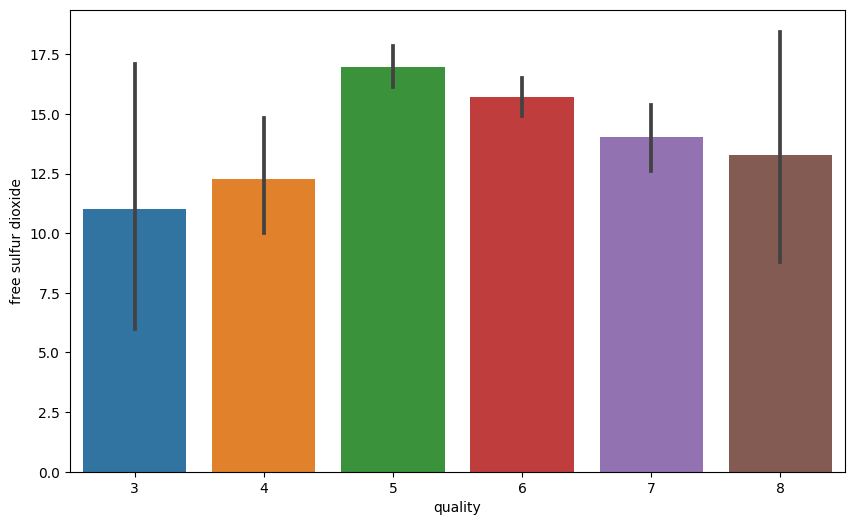

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

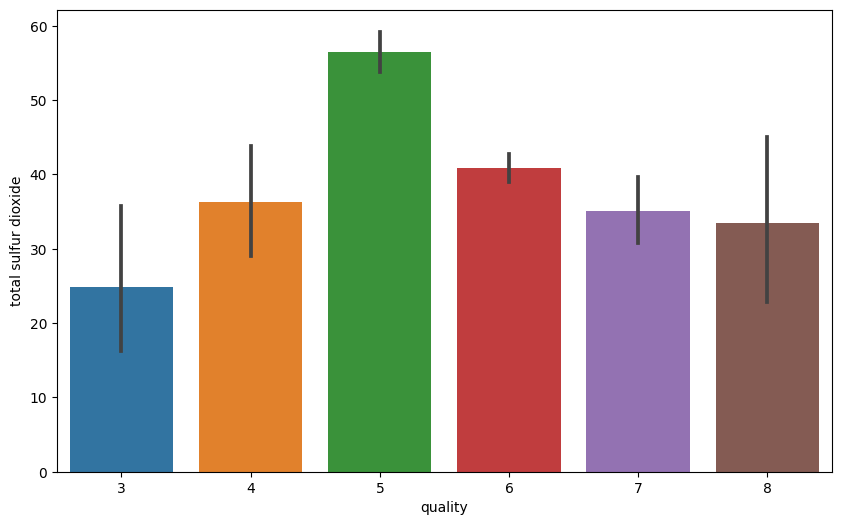

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

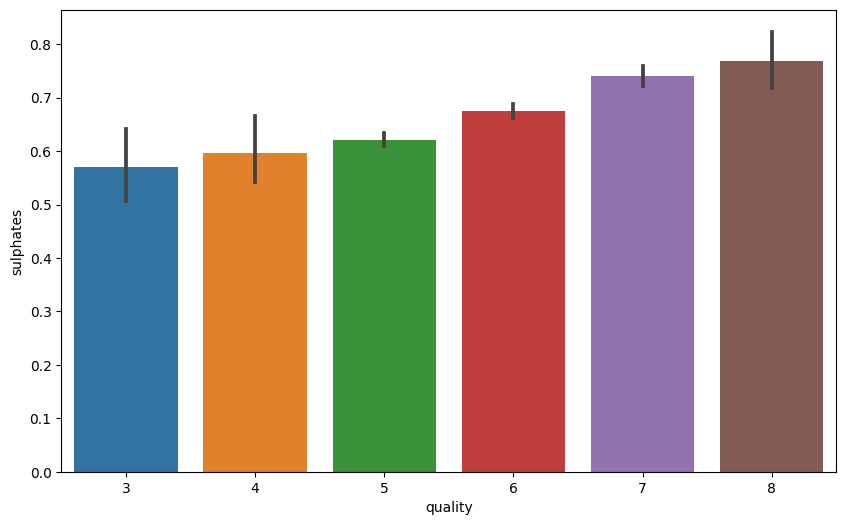

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

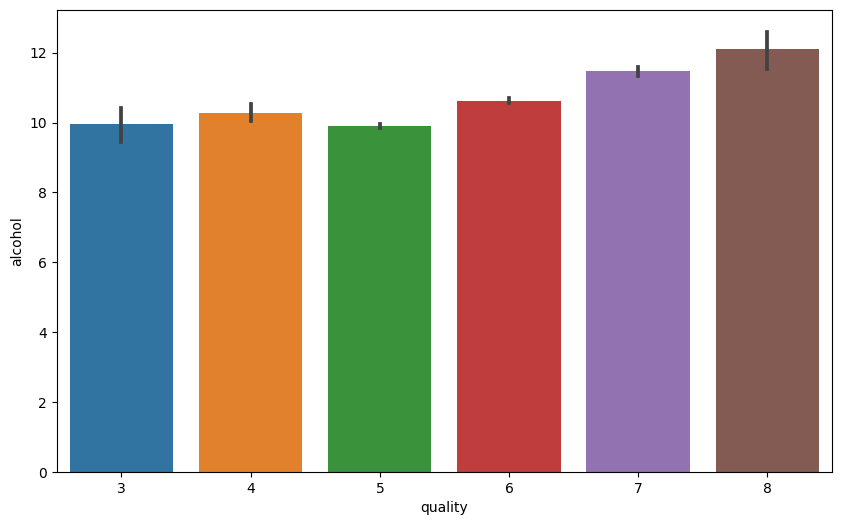

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named "wine" with a column "quality"

# Define the bins and labels
bins = (2, 6.5, 8)
group_names = ['bad', 'good']

# Create a new column "wine_quality" with the binary labels
wine['wine_quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

# Drop the original "quality" column if you want to keep only the binary classification
wine.drop('quality', axis=1, inplace=True)


In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: ylabel='count'>

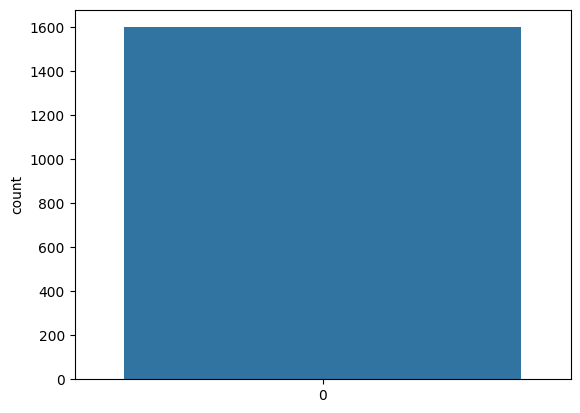

In [ ]:
sns.countplot(wine['quality'])

In [ ]:
# Separate the dataset into feature variables (X) and the response variable (y)
X = wine.drop('wine_quality', axis=1)
y = wine['wine_quality']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [55]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [57]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])


#### Random forest gives the accuracy of 87%

In [63]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains your true labels and pred_rfc contains your predicted labels
confusion = confusion_matrix(y_test, pred_rfc)
print(confusion)


NameError: ignored



## Stochastic Gradient Decent Classifier

In [65]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

ValueError: ignored

In [ ]:
print(classification_report(y_test, pred_sgd))

#### 84% accuracy using stochastic gradient descent classifier

In [ ]:
print(confusion_matrix(y_test, pred_sgd))

## Support Vector Classifier

In [64]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

ValueError: ignored

In [ ]:
print(classification_report(y_test, pred_svc))

#### Support vector classifier gets 86%

## Let's try to increase our accuracy of models
## Grid Search CV

In [66]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [67]:
grid_svc.fit(X_train, y_train)

ValueError: ignored

In [68]:
#Best parameters for our svc model
grid_svc.best_params_

AttributeError: ignored

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

### Random forest accuracy increases from 87% to 91 % using cross validation score

### Thank for going through this notebook

## If you find this notebook useful then please upvote. So the beginners can find easily